In [181]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import shap
df = pd.read_csv('C:/Users/m/Desktop/Thesis Tasks/Jupyter Lab/Mental Health/Mental health 2Class.csv')

In [182]:
df.sample(6)

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19,Mental_Health_Status
93,Male,Yes,Rural,No,Yes,Yes,Yes,Yes,No,No,No,2,1,Yes,Poor
120,Male,Yes,Rural,No,Yes,Yes,Yes,Yes,Yes,No,Yes,3,4,Yes,Poor
181,Male,Yes,Rural,No,Yes,Yes,Yes,Yes,No,No,No,2,1,No,Poor
25,Male,Yes,Urban,No,Yes,Yes,Yes,Yes,Yes,No,No,3,4,No,Better
4,Male,Yes,Urban,Yes,Yes,No,Yes,Yes,No,No,No,3,4,Yes,Better
61,Female,No,Urban,No,No,No,Yes,Yes,No,No,No,3,4,Yes,Poor


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Gender                                          253 non-null    object
 1   Worry_about_social_support_during_covid19       253 non-null    object
 2   Residence                                       253 non-null    object
 3   Stable_family_income                            253 non-null    object
 4   Living_with_parents                             253 non-null    object
 5   Relative_or_acquaintance_infected_with_covid19  253 non-null    object
 6   Worry_about_academic_delay                      253 non-null    object
 7   Disruption_of_daily_life                        253 non-null    object
 8   Exercise_during_covid19                         253 non-null    object
 9   Own_income                                      253 no

# Output column unique value

In [184]:
df.Mental_Health_Status.value_counts()

Better    166
Poor       87
Name: Mental_Health_Status, dtype: int64

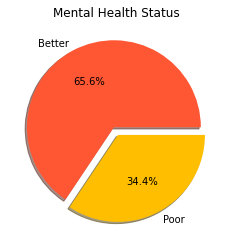

In [185]:
plt.pie(df.Mental_Health_Status.value_counts(), labels = ['Better','Poor'],colors = ['#FF5733','#FFBF00'],autopct='%1.1f%%',shadow=True, explode=(0.05, 0.05))
plt.title('Mental Health Status')
plt.show()

# Label Encoding

In [186]:
label_encoder =  preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Worry_about_social_support_during_covid19'] = label_encoder.fit_transform(df['Worry_about_social_support_during_covid19'])
df['Residence'] = label_encoder.fit_transform(df['Residence'])
df['Stable_family_income'] = label_encoder.fit_transform(df['Stable_family_income'])
df['Living_with_parents'] = label_encoder.fit_transform(df['Living_with_parents'])
df['Relative_or_acquaintance_infected_with_covid19'] = label_encoder.fit_transform(df['Relative_or_acquaintance_infected_with_covid19'])
df['Worry_about_academic_delay'] = label_encoder.fit_transform(df['Worry_about_academic_delay'])
df['Disruption_of_daily_life'] = label_encoder.fit_transform(df['Disruption_of_daily_life'])
df['Exercise_during_covid19'] = label_encoder.fit_transform(df['Exercise_during_covid19'])
df['Own_income'] = label_encoder.fit_transform(df['Own_income'])
df['Quarrel_between_parents'] = label_encoder.fit_transform(df['Quarrel_between_parents'])
df['Fear_of_getting_infected_with_covid19'] = label_encoder.fit_transform(df['Fear_of_getting_infected_with_covid19'])
df['Mental_Health_Status'] = label_encoder.fit_transform(df['Mental_Health_Status'])

In [187]:
df

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19,Mental_Health_Status
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1,0
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1,0
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1,0
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1,0
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1,0
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1,0
251,1,1,0,0,0,0,1,1,0,0,1,2,4,1,1


# Split target and input variable

In [188]:
x = df.drop(['Mental_Health_Status'],axis = 1)

In [189]:
x

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1
251,1,1,0,0,0,0,1,1,0,0,1,2,4,1


In [190]:
xx = x.copy()
xx

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1
251,1,1,0,0,0,0,1,1,0,0,1,2,4,1


In [191]:
y = df['Mental_Health_Status']
y

0      0
1      0
2      0
3      1
4      0
      ..
248    0
249    0
250    0
251    1
252    0
Name: Mental_Health_Status, Length: 253, dtype: int32

In [192]:
y.value_counts()

0    166
1     87
Name: Mental_Health_Status, dtype: int64

#  Split dataset into train and test sets

In [193]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=43 )

# Model Apply ( RF)    ( Without Oversampling )

In [196]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=100, random_state=51)
rnf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=51)

In [199]:
# Accuracy on Training 
predictions_train = rnf.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))

# define the evaluation method
print('\nRepeated 5-Folds Cross-Validation for Model Evaluation :\n')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(rnf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9752475247524752

Testing Accuracy :  0.7058823529411765

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.651 (0.059)


# Univariate Selection

In [200]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

In [201]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func = f_classif, k=14)
fit = bestfeatures.fit(x,y)

In [202]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [203]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score')) 

                                          Features      Score
10                         Quarrel_between_parents  18.194640
1        Worry_about_social_support_during_covid19  17.350977
7                         Disruption_of_daily_life  13.768983
3                             Stable_family_income   7.531769
13           Fear_of_getting_infected_with_covid19   6.177596
9                                       Own_income   5.082824
6                       Worry_about_academic_delay   3.392052
8                          Exercise_during_covid19   1.628021
11                Sleep_status_hour_during_covid19   0.987650
4                              Living_with_parents   0.747179
5   Relative_or_acquaintance_infected_with_covid19   0.633973
2                                        Residence   0.299108
0                                           Gender   0.202571
12          Internet_browsing_hours_during_covid19   0.078757


In [204]:
x = df.drop(['Internet_browsing_hours_during_covid19','Mental_Health_Status'],axis = 1) 
x

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,1
1,1,1,0,1,1,1,1,1,0,0,1,2,1
2,1,1,1,1,0,1,1,1,0,0,0,1,1
3,0,1,1,1,1,0,1,1,0,0,2,2,1
4,1,1,1,1,1,0,1,1,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,1
249,1,1,0,0,1,1,1,1,0,0,1,2,1
250,1,0,1,1,1,0,1,1,0,0,1,2,1
251,1,1,0,0,0,0,1,1,0,0,1,2,1


In [205]:
y = df['Mental_Health_Status']
y

0      0
1      0
2      0
3      1
4      0
      ..
248    0
249    0
250    0
251    1
252    0
Name: Mental_Health_Status, Length: 253, dtype: int32

In [206]:
x

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,1
1,1,1,0,1,1,1,1,1,0,0,1,2,1
2,1,1,1,1,0,1,1,1,0,0,0,1,1
3,0,1,1,1,1,0,1,1,0,0,2,2,1
4,1,1,1,1,1,0,1,1,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1,1,1,1,1,1,1,1,1,0,1,1,1
249,1,1,0,0,1,1,1,1,0,0,1,2,1
250,1,0,1,1,1,0,1,1,0,0,1,2,1
251,1,1,0,0,0,0,1,1,0,0,1,2,1


# Train and test sets

In [207]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state = 2021 )

# RF

In [208]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=100, random_state=40)

In [209]:
rnf.fit(x_train,y_train)

RandomForestClassifier(random_state=40)

In [210]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))

# define the evaluation method
print('\nRepeated 5-Folds Cross-Validation for Model Evaluation :\n')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(rnf, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9257425742574258

Testing Accuracy :  0.803921568627451

Repeated 5-Folds Cross-Validation for Model Evaluation :

Mean Accuracy: 0.665 (0.061)


# Random Forest with hyperparameter Tuning

In [220]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 100, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3]
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [221]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [222]:
rf_Model = RandomForestClassifier()

In [223]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = 2)

In [224]:
rf_Grid.fit(xtrain, ytrain)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [80, 85, 90, 95, 100]},
             verbose=2)

In [225]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 85}

# Accuracy

In [226]:
print (f'Train Accuracy - : {rf_Grid.score(xtrain,ytrain):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(xtest,ytest):.3f}')

Train Accuracy - : 0.733
Test Accuracy - : 0.706


# With Oversampling

In [237]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(xx, y)
X, Y = ros.fit_sample(xx, y)

In [238]:
X

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,3,1
1,1,1,0,1,1,1,1,1,0,0,1,2,4,1
2,1,1,1,1,0,1,1,1,0,0,0,1,3,1
3,0,1,1,1,1,0,1,1,0,0,2,2,3,1
4,1,1,1,1,1,0,1,1,0,0,1,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1,1,0,0,1,0,1,1,0,0,1,3,2,1
328,1,1,0,1,1,1,1,1,1,0,1,2,1,1
329,1,1,0,0,1,0,1,1,0,0,1,3,2,1
330,1,1,1,1,1,1,1,1,0,0,1,2,4,1


In [239]:
Y.value_counts()

1    166
0    166
Name: Mental_Health_Status, dtype: int64

In [240]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state = 2021 )

# RF

In [241]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=125, random_state=40)
rnf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=125, random_state=40)

In [242]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


# # define the evaluation method
# print('\nRepeated 5-Folds Cross-Validation for Model Evaluation :\n')
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# # evaluate the model on the dataset
# n_scores = cross_val_score(rnf, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
# print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Training Accuracy :  0.9735849056603774

Testing Accuracy :  0.7910447761194029


# Parameter tuning

In [243]:
rf_Grid.fit(xtrain, ytrain)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 3],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [80, 85, 90, 95, 100]},
             verbose=2)

In [244]:
print (f'Train Accuracy - : {rf_Grid.score(xtrain,ytrain):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(xtest,ytest):.3f}')

Train Accuracy - : 0.708
Test Accuracy - : 0.706


In [245]:
X= X.drop(['Internet_browsing_hours_during_covid19'],axis = 1) 

In [246]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
327    1
328    1
329    1
330    1
331    1
Name: Mental_Health_Status, Length: 332, dtype: int32

In [247]:
X

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Fear_of_getting_infected_with_covid19
0,1,1,1,0,1,1,1,1,0,1,1,2,1
1,1,1,0,1,1,1,1,1,0,0,1,2,1
2,1,1,1,1,0,1,1,1,0,0,0,1,1
3,0,1,1,1,1,0,1,1,0,0,2,2,1
4,1,1,1,1,1,0,1,1,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,1,1,0,0,1,0,1,1,0,0,1,3,1
328,1,1,0,1,1,1,1,1,1,0,1,2,1
329,1,1,0,0,1,0,1,1,0,0,1,3,1
330,1,1,1,1,1,1,1,1,0,0,1,2,1


In [248]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state = 2021 )

In [249]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=125, random_state=40)
rnf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=125, random_state=40)

In [250]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


Training Accuracy :  0.9433962264150944

Testing Accuracy :  0.7910447761194029


# With Oversampling (Another Method )

In [251]:
# Divide by class
class_count_0, class_count_1 = df['Mental_Health_Status'].value_counts()
df_class_0 = df[df['Mental_Health_Status'] == 0]
df_class_1 = df[df['Mental_Health_Status'] == 1]

print('class 0(Better):', df_class_0.shape)
print('class 1(Poor):', df_class_1.shape)

class 0(Better): (166, 15)
class 1(Poor): (87, 15)


1    166
0    166
Name: Mental_Health_Status, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

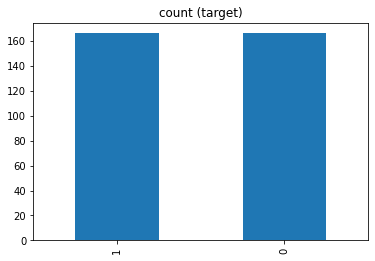

In [252]:
class_1_over = df_class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, df_class_0], axis=0)

print(test_over['Mental_Health_Status'].value_counts())

test_over['Mental_Health_Status'].value_counts().plot(kind='bar', title='count (target)')

In [253]:
x = test_over.drop(['Mental_Health_Status'], axis =1)
x

,Gender,Worry_about_social_support_during_covid19,Residence,Stable_family_income,Living_with_parents,Relative_or_acquaintance_infected_with_covid19,Worry_about_academic_delay,Disruption_of_daily_life,Exercise_during_covid19,Own_income,Quarrel_between_parents,Sleep_status_hour_during_covid19,Internet_browsing_hours_during_covid19,Fear_of_getting_infected_with_covid19
164,1,1,0,0,1,0,1,1,1,0,1,1,3,1
58,1,1,1,1,1,1,1,1,0,0,2,3,3,1
15,1,1,0,0,0,1,1,1,0,0,2,1,2,1
96,1,1,0,0,0,0,1,1,0,0,2,2,3,0
96,1,1,0,0,0,0,1,1,0,0,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1,1,0,0,1,0,1,1,0,0,1,3,3,1
248,1,1,1,1,1,1,1,1,1,0,1,1,4,1
249,1,1,0,0,1,1,1,1,0,0,1,2,3,1
250,1,0,1,1,1,0,1,1,0,0,1,2,3,1


In [254]:
y = df['Mental_Health_Status']
y

0      0
1      0
2      0
3      1
4      0
      ..
248    0
249    0
250    0
251    1
252    0
Name: Mental_Health_Status, Length: 253, dtype: int32

In [255]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2,random_state = 2021 )

In [256]:
rnf = RandomForestClassifier(n_estimators=125, random_state=40)
rnf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=125, random_state=40)

In [257]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


Training Accuracy :  0.9433962264150944

Testing Accuracy :  0.7910447761194029
